In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

sys.path.insert(1, '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/Github/criticality/')
import criticality as crfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

#Import your modules
#---------------------------------------
os.chdir(Fcode + '/img_process/')
import admin_functions as adfn



ModuleNotFoundError: No module named 'IS'

# Process data

In [14]:
#Find range to make bin over for correlation function
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regb*')

In [133]:
from sklearn.metrics.pairwise import euclidean_distances

#Find range to make bin over for correlation function
mini = 0
maxi = 0
dim = [.8, .8, 15]

for c in coord_l:
    coord = np.load(c)
    dist = euclidean_distances(coord)
    curr_max = np.max(dist)
    if maxi < curr_max:
        maxi = curr_max
print(maxi)

655.138672844927


In [519]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regtrace*')[29:]
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regdelt*')[29:]
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')[29:]
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')[29:]
len(trace_l), len(dff_l), len(bind_l), len(coord_l)
trace_l

['BLNDEV-WILDTYPE-08_2photon_sess-01-8dpf_BLNGR_run-01_regtrace.npy']

In [61]:
for t in trace_l:
    curr = np.load(t)
    print(curr.shape)

(15105, 4914)
(14559, 4914)
(16735, 4914)
(14654, 4914)
(15350, 4914)
(10725, 4914)
(12065, 4914)
(14231, 4914)
(13463, 4914)
(11684, 4914)
(13439, 4914)
(14603, 4914)
(16472, 4914)
(15091, 4914)
(11994, 4914)
(15099, 4914)
(12233, 4914)
(14190, 4914)
(13710, 4914)
(14670, 4914)
(12418, 4914)
(15336, 4914)
(14004, 4914)
(14311, 4914)
(12356, 4914)
(10155, 4914)
(11054, 4914)
(10115, 4914)
(12249, 4914)
(13323, 4914)


In [26]:
#Find mean nnb in previous work
prac = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*cutrealtrace*')
nnb_list = []
for i in range(len(prac)):
    nnb_list = np.append(nnb_list, np.load(prac[i]).shape[0]*(0.16/100))
print('mean neighbours = ' + str(np.mean(nnb_list)))

mean neighbours = 14.12128


In [ ]:
# Run avalanches across all brain areas

n_neigh = 14 #14
n_bins = 200 #Number of bins for correlation function
reg_list = ['all', 'Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']

for i in range(len(trace_l)):
    trace = np.load(trace_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(bind_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(trace_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        data = tfn.trace_analyse(name, sub_trace, sub_dff, sub_bind, sub_coord) #Initiate class
        
        #Criticality statistics
        crit = data.criticality_stats(n_neigh, n_bins, mini, maxi) 
        par_list = ['av', 'llr_s', 'llr_d', 'exp_s', 'exp_d', 'dcc', 'br', 'corrdis']
        dic = {}
        dic.update({par: data.__dict__[par] for par in par_list})
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_criticality.npy', dic)
        
        #Firing statistics
        f_stats = data.firing_stats(30, 50) 
        par_list = ['fr', 'fa', 'fd', 's_corr', 'l_corr', 'dim']
        dic = {}
        dic.update({par: data.__dict__[par] for par in par_list})
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_firing.npy', dic)
        
        
    print('Processed ' + name)

In [520]:
%autoreload
# Run brain dynamics stats across all brain areas

reg_list = ['Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']

for i in range(len(trace_l)):
    trace = np.load(trace_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(bind_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(trace_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        data = tfn.trace_analyse(name, sub_trace, sub_dff, sub_bind, sub_coord) #Initiate class

        #Criticality statistics
        bind_transformed = sub_bind[:,1:4913].T
        dynamics = data.dyn_stats(bind_transformed) 

        par_list = ['n_states', 'm_dwell', 'null_m_dwell', 'dist', 'le']
        dic = {}
        dic.update({par: data.__dict__[par] for par in par_list})
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_dynamics.npy', dic)

    print('Processed ' + name)

Loaded BLNDEV-WILDTYPE-08_2photon_sess-01-8dpf_BLNGR_run-01
metastability calculated
state distance calculated
LE calculated
Loaded BLNDEV-WILDTYPE-08_2photon_sess-01-8dpf_BLNGR_run-01
metastability calculated
state distance calculated
LE calculated
Loaded BLNDEV-WILDTYPE-08_2photon_sess-01-8dpf_BLNGR_run-01
metastability calculated
state distance calculated
LE calculated
Loaded BLNDEV-WILDTYPE-08_2photon_sess-01-8dpf_BLNGR_run-01
metastability calculated
state distance calculated
LE calculated
Processed BLNDEV-WILDTYPE-08_2photon_sess-01-8dpf_BLNGR_run-01


In [9]:
#This function extracts each data type
def load(data_list, name_list):

    obj = { i:[[]]*len(data_list) for i in name_list  }

    for i in range(len(data_list)):
        for e in range(len(data_list[i])):
            data = np.load(data_list[i][e], allow_pickle=True).item()
            for name in name_list:
                curr = data[name]
                obj[name][i] = np.append(obj[name][i], curr)

        print(i)
        
    len_list = []
    for i in range(len(data_list)):
        count = 0
        for e in range(len(data_list[i])):
            count+=1

        len_list = np.append(len_list, count)
        
    return(obj, len_list)
    
#This function sorts all data by condition
def sort(curr_name, obj):
    input_data = adfn.comb_list(obj[curr_name])

    cond = np.arange(3, 9)
    cond_l = []
    for i in range(len(len_list)):
        for e in range(int(len_list[i])):
            cond_l = np.append(cond_l, cond[i])

    df = pd.DataFrame({curr_name:input_data , "condition": cond_l})
    return(df)

# Whole brain

In [278]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*3dpf*all*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*4dpf*all*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*5dpf*all*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*6dpf*all*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*7dpf*all*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*8dpf*all*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [ ]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

## Critical stats

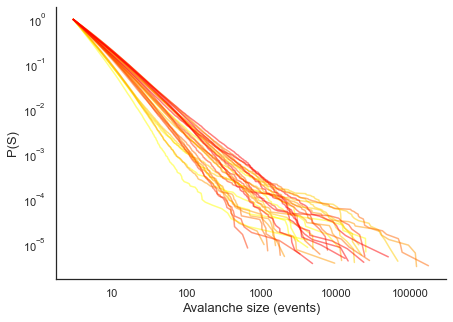

In [285]:
#Avalanche size - all distributions

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 0.5, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

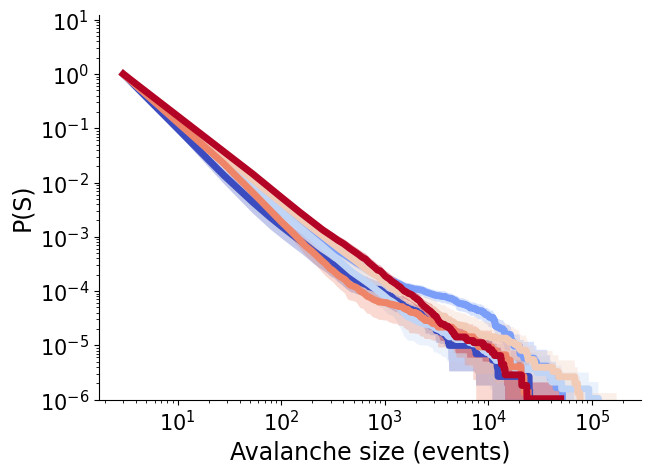

In [280]:
from matplotlib import cm


colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis, histlist = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)
    stop = 30000
    xaxis = np.mean(histlist, axis= 0)
    sem = stats.sem(histlist)
    minus = (xaxis-(sem))[:stop]
    #minus [minus < 0.00001] = 0
    plus = (xaxis+(sem))[:stop]
    plt.fill_between(yaxis[:stop], minus, plus,facecolor=colors[i],alpha=0.3,linewidth = 0)


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.ylim(0.000001)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

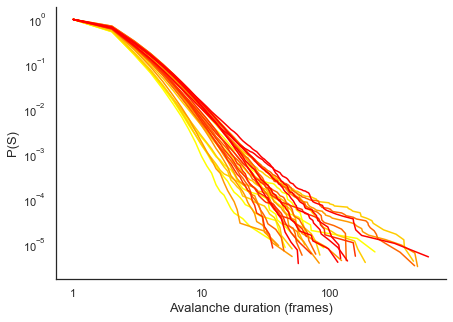

In [90]:
#Avalanche dur - all distributions


import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche duration (frames)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

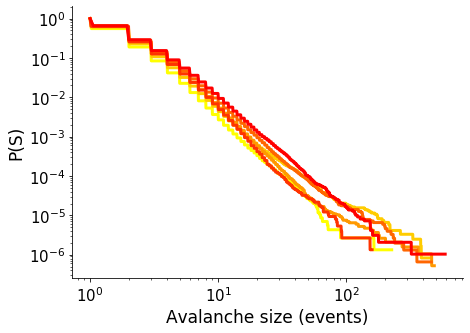

In [7]:
#Avalanche dur - mean distributions


colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 10000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 3)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

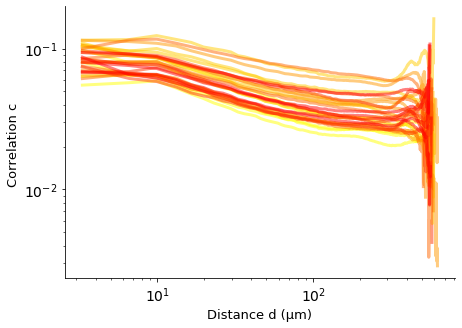

In [8]:
#Correlation function

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))


for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        yaxis,xaxis = data['corrdis']
        axarr.plot(yaxis,xaxis, '-', linewidth = 3, alpha =0.5, color = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('Distance d (μm)', size = '13')
axarr.set_ylabel('Correlation c ', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

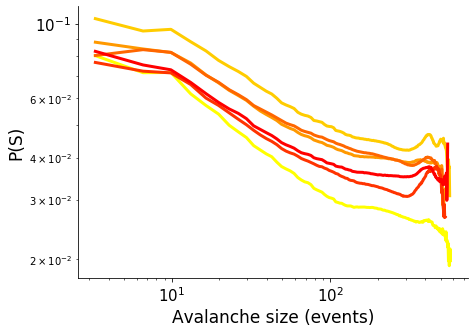

In [9]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
fig, axarr = plt.subplots(figsize = (7,5))

for e in range(len(data_ll)):
    
    data_l = data_ll[e]
    mean_y, mean_x = np.mean(np.asarray([np.load(data_l[i], allow_pickle=True).item()['corrdis'] for i in range(len(data_l))]), axis=0)
    yaxis,yaxis = data['corrdis']
    axarr.plot(mean_y,mean_x, '-', linewidth = 3, alpha = 1, color = colors[e])

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

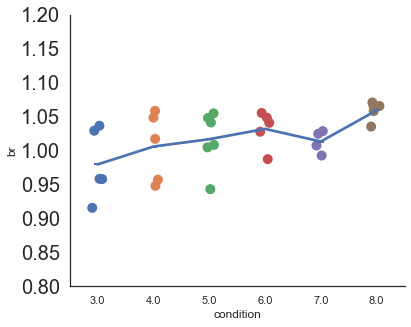

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.8, 1.2)
plt.show()


In [14]:
from scipy import stats
stats.pearsonr(dic['br'], dic['condition'])

(0.520481039193331, 0.0031924600255140486)

In [15]:
from scipy import stats
stats.spearmanr(dic['br'], dic['condition'])

SpearmanrResult(correlation=0.47021031077701975, pvalue=0.00874024680748428)

In [82]:
adfn.save_shared_files(Fcode, 'criticality', 'admin')

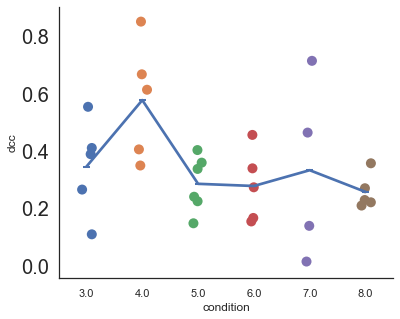

In [16]:
import seaborn as sns
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [17]:
from scipy import stats
stats.spearmanr(dic['dcc'], dic['condition'])

SpearmanrResult(correlation=-0.33122300202527116, pvalue=0.07378386630882768)

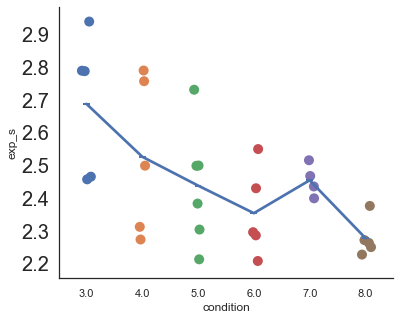

In [18]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [19]:
from scipy import stats
stats.spearmanr(dic['exp_s'], dic['condition'])

SpearmanrResult(correlation=-0.5588824087306516, pvalue=0.0013262845542400274)

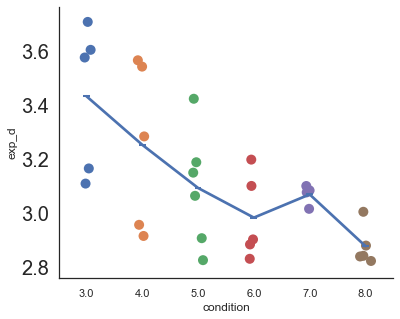

In [20]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [21]:
from scipy import stats
stats.spearmanr(dic['exp_d'], dic['condition'])

SpearmanrResult(correlation=-0.659738459074859, pvalue=7.309077938858285e-05)

## Firing stats

In [474]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*3dpf*n_fir*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*4dpf*n_fir*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*5dpf*n_fir*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*6dpf*n_fir*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*7dpf*n_fir*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*8dpf*n_fir*')
data_ll = d3, d4, d5, d6, d7, d8

In [475]:
data_ll

(['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_firing.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_firing.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_firing.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_firing.npy',
  'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_firing.npy',
  'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_firing.npy',
  'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_firing.npy',
  'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_firing.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_firing.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_firing.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_firing.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_firing.npy',
  'BLNDEV-WILDTYPE-07_2photon_sess

In [53]:
name_list = ['fr', 'fa', 'fd', 's_corr', 'l_corr', 'dim']
reg_list = ['Diencephalon', 'Hindbrain', 'Midbrain', 'Telencephalon']
obj, len_list = load_comb(data_ll, name_list)
fr_df = sort_comb('fr', obj, reg_list)
fa_df = sort_comb('fa', obj, reg_list)
fd_df = sort_comb('fd', obj, reg_list)
sc_df = sort_comb('s_corr', obj, reg_list)
lc_df = sort_comb('l_corr', obj, reg_list)
dim_df = sort_comb('dim', obj,reg_list)

0
1
2
3
4
5


In [183]:
fr_df ['frps'] = ((fr_df['fr']*30).values / 4914)*2.73
fr_df['condition'] = fr_df['condition'].astype(int)

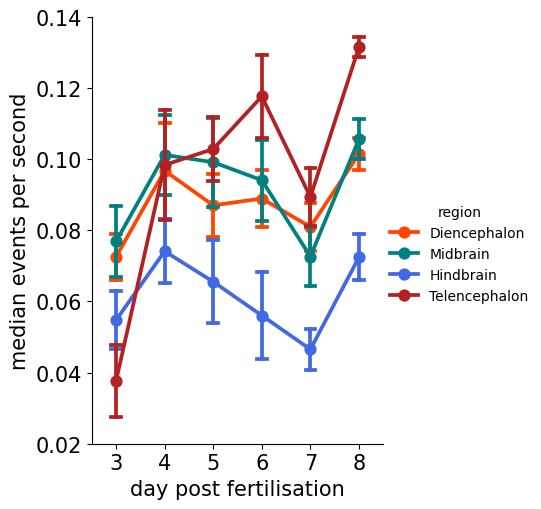

In [184]:
data_name = 'frps'
dic = fr_df

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'median events per second')
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)
plt.savefig(Fcode + 'prac1.svg', transparent=True)
# Show the plot
plt.show()

In [186]:
dic

,fr,condition,region,frps
0,5.466667,3,Diencephalon,0.091111
1,2.500000,3,Hindbrain,0.041667
2,6.000000,3,Midbrain,0.100000
3,0.533333,3,Telencephalon,0.008889
4,4.733333,3,Diencephalon,0.078889
...,...,...,...,...
115,7.616667,8,Telencephalon,0.126944
116,5.950000,8,Diencephalon,0.099167
117,4.500000,8,Hindbrain,0.075000
118,5.133333,8,Midbrain,0.085556


In [198]:
print(np.mean(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)]), 1.96*(np.std(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])/np.sqrt(len(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)]))))
print(np.mean(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)]), 1.96*(np.std(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])/np.sqrt(len(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)]))))


0.03766666666666667 0.017864150624389178
0.13155555555555554 0.004861373681797568


In [195]:
print(np.mean(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)]), 1.96*np.std(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])/np.sqrt(len(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])))
print(np.mean(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)]), 1.96*np.std(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])/np.sqrt(len(dic["frps"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])))


0.03766666666666667 0.009114362563463867


In [118]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["frps"][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["frps"][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["frps"][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["frps"][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=0.6127183770103806, pvalue=0.0003190526577887385)
Diencephalon SignificanceResult(statistic=0.31411015907371365, pvalue=0.0909442465187946)
Midbrain SignificanceResult(statistic=0.09946694289103558, pvalue=0.6010067628049046)
Hindbrain SignificanceResult(statistic=0.002820673123865963, pvalue=0.98819733559976)


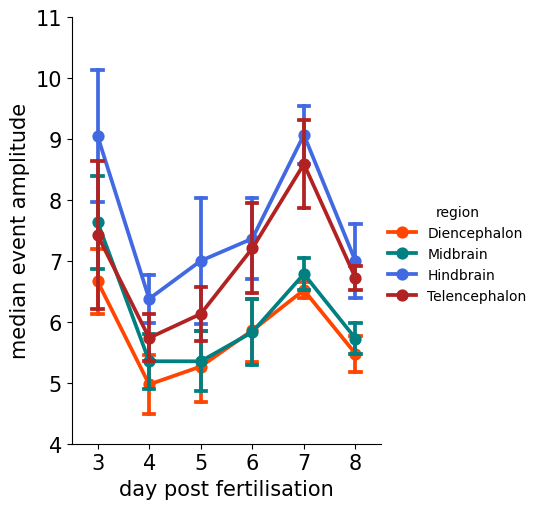

In [157]:
data_name = 'fa'
dic = fa_df
fa_df['condition'] = fa_df['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'median event amplitude')
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)
plt.savefig(Fcode + 'prac2.svg', transparent=True)
# Show the plot
plt.show()

In [158]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["fa"][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["fa"][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["fa"][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["fa"][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=0.20667593314383403, pvalue=0.2731689498385491)
Diencephalon SignificanceResult(statistic=-0.03181365346428013, pvalue=0.8674578992604145)
Midbrain SignificanceResult(statistic=-0.0629504206846394, pvalue=0.7410442396471322)
Hindbrain SignificanceResult(statistic=0.040387545887277616, pvalue=0.8321863925452441)


In [161]:
fd_df['fd']/2.73

0      0.435772
1      0.435294
2      0.447879
3      0.381559
4      0.430100
         ...   
115    0.507306
116    0.470460
117    0.432117
118    0.441634
119    0.534640
Name: fd, Length: 120, dtype: float64

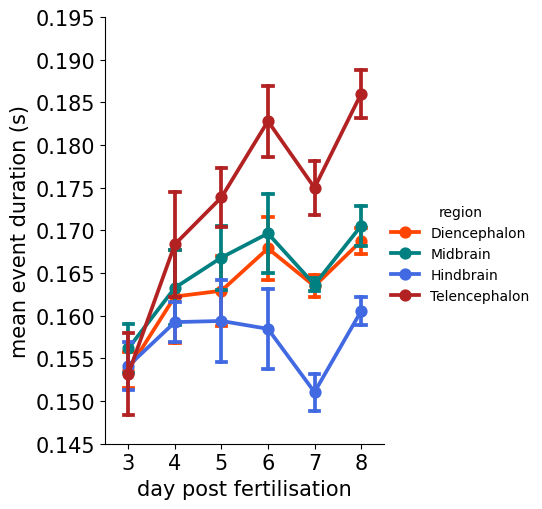

In [207]:
data_name = 'fd'
dic = fd_df
#fd_df['fd'] = fd_df['fd']/2.73

fd_df['condition'] = fd_df['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'mean event duration (s)')
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)
plt.savefig(Fcode + 'prac3.svg', transparent=True)
# Show the plot
plt.show()

In [203]:
dic

,fd,condition,region
0,0.058470,3,Diencephalon
1,0.058406,3,Hindbrain
2,0.060095,3,Midbrain
3,0.051196,3,Telencephalon
4,0.057709,3,Diencephalon
...,...,...,...
115,0.068068,8,Telencephalon
116,0.063124,8,Diencephalon
117,0.057980,8,Hindbrain
118,0.059257,8,Midbrain


In [200]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["fd"][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["fd"][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["fd"][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["fd"][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=0.6850088788479042, pvalue=2.9665915740928448e-05)
Diencephalon SignificanceResult(statistic=0.5236843240467672, pvalue=0.0029783810377988084)
Midbrain SignificanceResult(statistic=0.4422323460282912, pvalue=0.014407390933646872)
Hindbrain SignificanceResult(statistic=0.05888910322111428, pvalue=0.7572366031126652)


In [208]:
print(np.mean(dic["fd"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)]), 1.96*np.std(dic["fd"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])/np.sqrt(len(dic["fd"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])))
print(np.mean(dic["fd"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)]), 1.96*np.std(dic["fd"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])/np.sqrt(len(dic["fd"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])))


0.153179984790195 0.008379079154828037
0.18598973253927148 0.004877632362287566


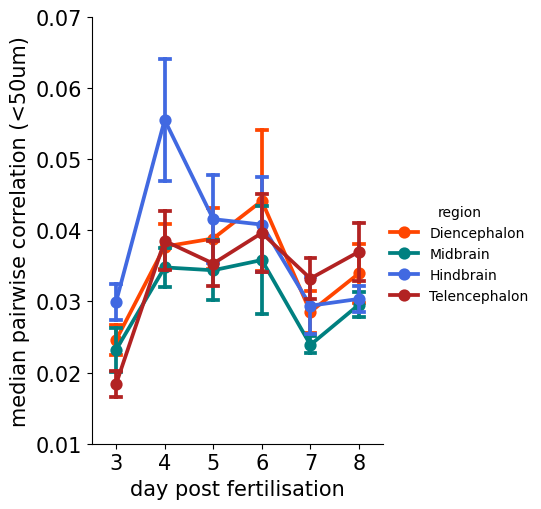

In [225]:
data_name = 's_corr'
dic = sc_df
sc_df['condition'] = sc_df['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'median pairwise correlation (<50um)')
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)
plt.savefig(Fcode + 'prac4.svg', transparent=True)
# Show the plot
plt.show()

In [226]:
print(np.mean(dic["s_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)]), 1.96*np.std(dic["s_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])/np.sqrt(len(dic["s_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])))
print(np.mean(dic["s_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)]), 1.96*np.std(dic["s_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])/np.sqrt(len(dic["s_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])))


0.018385442220574776 0.003276895097956432
0.036998214296254085 0.007164928168546956


In [166]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["s_corr"][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["s_corr"][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["s_corr"][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["s_corr"][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=0.3373149782205588, pvalue=0.06832014564706662)
Diencephalon SignificanceResult(statistic=0.12296766764562178, pvalue=0.5173946580983264)
Midbrain SignificanceResult(statistic=0.05550467200151001, pvalue=0.7708079348784171)
Hindbrain SignificanceResult(statistic=-0.1902050345417599, pvalue=0.31405136943210976)


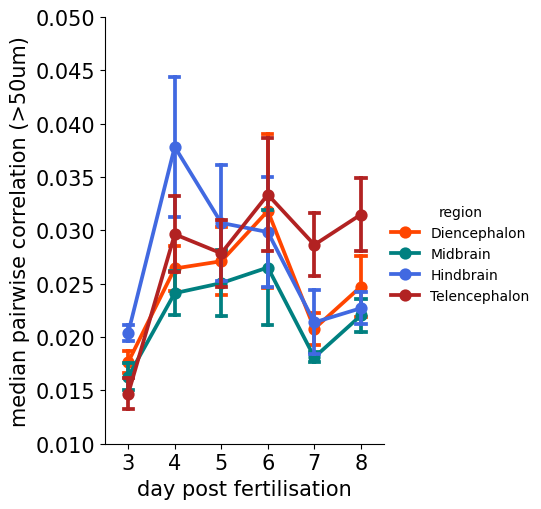

In [223]:
data_name = 'l_corr'
dic = lc_df

lc_df['condition'] = lc_df['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'median pairwise correlation (>50um)')
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)
plt.savefig(Fcode + 'prac5.svg', transparent=True)
# Show the plot
plt.show()

In [211]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["l_corr"][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["l_corr"][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["l_corr"][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["l_corr"][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=0.4729178557527033, pvalue=0.008309448933351076)
Diencephalon SignificanceResult(statistic=0.16651401600453006, pvalue=0.3791607608123756)
Midbrain SignificanceResult(statistic=0.19223569327352252, pvalue=0.30881573694542513)
Hindbrain SignificanceResult(statistic=-0.08303137925429141, pvalue=0.6626830564560007)


In [212]:
vec1 = dic["dim"][dic["region"] == "Telencephalon"]
vec2 = dic["dim"][dic["region"] == "Diencephalon"]

In [224]:
print(np.mean(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)]), 1.96*np.std(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])/np.sqrt(len(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])))
print(np.mean(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 4)]), 1.96*np.std(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 4)])/np.sqrt(len(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 4)])))


0.01468024139131693 0.002542128813552426
0.029634529655205383 0.0062760767840589655


In [210]:
print(np.mean(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)]), 1.96*np.std(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])/np.sqrt(len(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])))
print(np.mean(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)]), 1.96*np.std(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])/np.sqrt(len(dic["l_corr"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])))


0.01468024139131693 0.002542128813552426
0.031486123388260054 0.006030750373097314


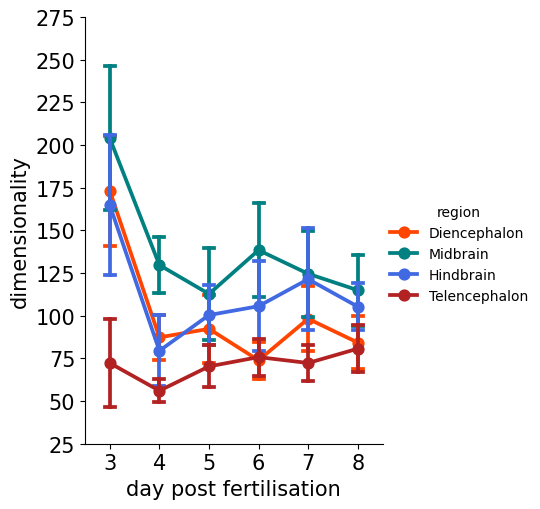

In [213]:
data_name = 'dim'
dic = dim_df

dim_df['condition'] = dim_df['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=15)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=15)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'dimensionality')
cat_plot.set_xlabels(fontsize=15)
cat_plot.set_ylabels(fontsize=15)
plt.savefig(Fcode + 'prac6.svg', transparent=True)
# Show the plot
plt.show()

In [171]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["dim"][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["dim"][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["dim"][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["dim"][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=0.31114204345561913, pvalue=0.09420616707386505)
Diencephalon SignificanceResult(statistic=-0.3156546184150915, pvalue=0.08928122711998593)
Midbrain SignificanceResult(statistic=-0.24796599402300612, pvalue=0.1864345474549958)
Hindbrain SignificanceResult(statistic=0.0027075449756834152, pvalue=0.9886706718947579)


In [217]:
tel = dic["dim"][dic["region"] == "Telencephalon"]
di = dic["dim"][dic["region"] == "Diencephalon"]
mi = dic["dim"][dic["region"] == "Midbrain"]
hi = dic["dim"][dic["region"] == "Hindbrain"]
tel

3       32.072543
7       37.058234
11      73.752312
15     171.896914
19      46.448816
23      38.904403
27      61.774155
31      46.327340
35      55.246092
39      77.994874
43      50.221386
47      75.448392
51      77.756967
55      43.488936
59      50.537081
63     124.303305
67      61.572184
71      68.786333
75     108.442742
79      48.248429
83      91.668919
87      66.905275
91      68.636785
95      51.235607
99     102.412165
103     90.478997
107     97.238490
111    115.312455
115     63.109943
119     37.301679
Name: dim, dtype: float64

In [220]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import numpy as np


# Function to perform the tests and print the results
def perform_tests(group1, group2, group2_name):
    # Shapiro-Wilk test for normality
    _, p_value_normal1 = shapiro(group1)
    _, p_value_normal2 = shapiro(group2)

    print(f"Shapiro-Wilk p-value for {group2_name}: {p_value_normal2}")

    # Check normality and perform the appropriate test
    if p_value_normal1 > 0.05 and p_value_normal2 > 0.05:
        # Both groups are normally distributed, perform independent t-test
        t_stat, p_value_ttest = ttest_ind(group1, group2)
        print("oky")
        print(f"Independent t-test p-value: {p_value_ttest}")
    else:
        # At least one group is not normally distributed, perform Mann-Whitney U test
        u_stat, p_value_mannwhitney = mannwhitneyu(group1, group2, alternative='two-sided')
        print(f"Mann-Whitney U test p-value: {p_value_mannwhitney, u_stat}")

# Perform tests for each group
perform_tests(tel, di, "Diencephalon")
perform_tests(tel, mi, "Midbrain")
perform_tests(tel, hi, "Hindbrain")


Shapiro-Wilk p-value for Diencephalon: 0.00848271232098341
Mann-Whitney U test p-value: (0.009883401291685813, 275.0)
Shapiro-Wilk p-value for Midbrain: 0.0566045381128788
Mann-Whitney U test p-value: (1.018768935242708e-05, 151.0)
Shapiro-Wilk p-value for Hindbrain: 0.02144830860197544
Mann-Whitney U test p-value: (0.0015177961906131159, 235.0)


In [221]:
perform_tests(tel, np.append(di, np.append(mi, hi)), "all")


Shapiro-Wilk p-value for all: 2.9788061510771513e-05
Mann-Whitney U test p-value: (3.0097512964541168e-05, 661.0)


In [222]:
np.append(di, np.append(mi, hi))

array([ 85.12852159, 175.72751999, 129.2792942 , 276.54547453,
       198.9941975 ,  56.23545989, 130.41065022,  81.53314696,
       102.4240244 ,  65.96366215,  60.42715014,  99.1742213 ,
        47.53178323,  49.87772152, 132.43671244, 164.38871232,
        47.86223013,  74.59596503, 108.20674157,  55.43860262,
        83.27835387, 121.74600437, 121.55168233,  41.60192105,
       107.85574355, 115.02843741,  98.45870057,  93.88522649,
        88.802838  ,  25.20230649,  97.76682814, 109.48297767,
       294.56982691, 282.86729259, 234.76387052,  70.16282829,
       141.67226185, 121.62572126, 157.73888614, 157.2110613 ,
        48.64173479, 112.0399278 ,  73.96103903,  60.64682361,
       162.26773314, 218.93355359,  80.5002131 , 152.59226671,
       193.05612453,  67.70858282, 198.19991601, 142.66122678,
       181.59978268,  62.28553549, 111.74929842, 191.27388045,
       111.4435318 ,  89.81547804, 114.68317471,  67.56675784,
        70.93847555,  96.87976666, 281.54111149, 240.22

# All regions

In [23]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*n_crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*n_crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*n_crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*n_crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*n_crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*n_crit*')
data_ll = d3, d4, d5, d6, d7, d8


In [25]:
#This function extracts each data type
def load_comb(data_list, name_list):

    obj = { i:[[]]*len(data_list) for i in name_list  }

    for i in range(len(data_list)):
        for e in range(len(data_list[i])):
            data = np.load(data_list[i][e], allow_pickle=True).item()
            for name in name_list:
                curr = data[name]
                obj[name][i] = np.append(obj[name][i], curr)

        print(i)
        
    len_list = []
    for i in range(len(data_list)):
        count = 0
        for e in range(len(data_list[i])):
            count+=1

        len_list = np.append(len_list, count)
        
    return(obj, len_list)

#This function sorts all data by condition
def sort_comb(curr_name, obj, reg_list):

    input_data = adfn.comb_list(obj[curr_name])
    reg_data = np.ravel(adfn.repeat_list(reg_list, 30))

    cond = np.arange(3, 9)
    cond_l = []
    for i in range(len(len_list)):
        for e in range(int(len_list[i])):
            cond_l = np.append(cond_l, cond[i])

    df = pd.DataFrame({curr_name:input_data , "condition": cond_l, "region": reg_data})

    return(df)

In [30]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
reg_list = ['Diencephalon', 'Hindbrain', 'Midbrain', 'Telencephalon']
obj, len_list = load_comb(data_ll, name_list)
br_df = sort_comb('br', obj, reg_list)
dcc_df = sort_comb('dcc', obj, reg_list)
xs_df = sort_comb('exp_s', obj, reg_list)
xd_df = sort_comb('exp_d', obj, reg_list) 

0
1
2
3
4
5


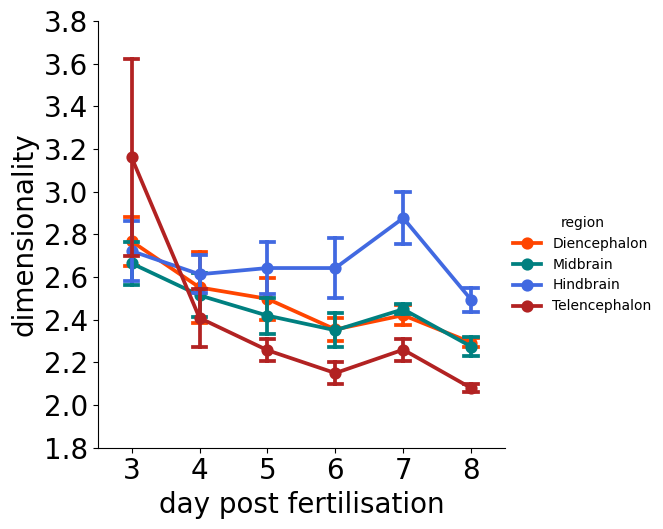

In [319]:
data_name = 'exp_s'
dic = xs_df

dic['condition'] = dic['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=1, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=20)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=20)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'dimensionality')
cat_plot.set_xlabels(fontsize=20)
cat_plot.set_ylabels(fontsize=20)
plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [320]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic["exp_s"][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic["exp_s"][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic["exp_s"][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic["exp_s"][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=-0.6592872015789116, pvalue=7.422090682505358e-05)
Diencephalon SignificanceResult(statistic=-0.5340632464535537, pvalue=0.0023674455425536332)
Midbrain SignificanceResult(statistic=-0.46592336456552114, pvalue=0.009460842089336332)
Hindbrain SignificanceResult(statistic=-0.021660359805467322, pvalue=0.9095464579693969)


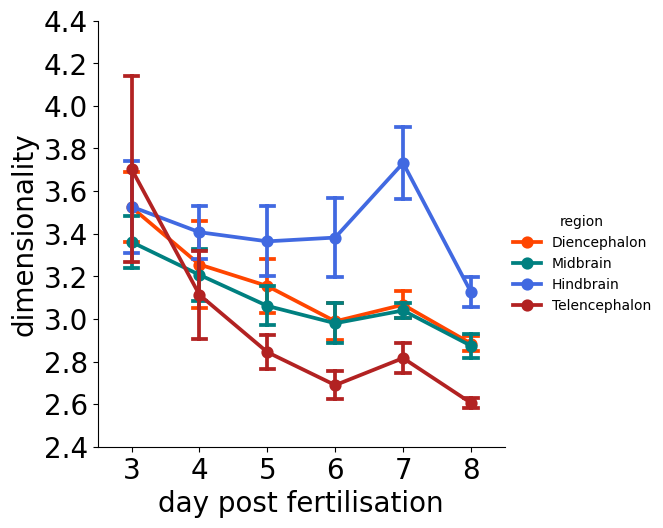

In [321]:
data_name = 'exp_d'
dic = xd_df

dic['condition'] = dic['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', errorbar='se', capsize=0.2, kind='point', height=5, aspect=1, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=20)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=20)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'dimensionality')
cat_plot.set_xlabels(fontsize=20)
cat_plot.set_ylabels(fontsize=20)
plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [237]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic[data_name][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic[data_name][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=-0.6441700754646793, pvalue=0.00012234503100635134)
Diencephalon SignificanceResult(statistic=-0.5252637252825826, pvalue=0.002877461923745444)
Midbrain SignificanceResult(statistic=-0.5837015710077497, pvalue=0.0007090881262309532)
Hindbrain SignificanceResult(statistic=-0.11033245775909918, pvalue=0.5616353794182671)


In [2]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*n_LLR*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*n_LLR*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*n_LLR*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*n_LLR*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*n_LLR*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*n_LLR*')
data_ll = np.hstack((d3, d4, d5, d6, d7, d8))
data_ll[:10]

array(['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_LLR_allstot.npy'],
      dtype='<U82')

In [6]:
choose = 0
llr_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    llr_l[i] = np.load(data_ll[i])[choose][0]
    
reg_list = ['Diencephalon', 'Hindbrain', 'Midbrain', 'Telencephalon']


choose = 0
llr_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    llr_l[i] = np.load(data_ll[i])[choose][0]


len_list = []
seq_l = d3, d4, d5, d6, d7, d8
for i in range(len(seq_l)):
    count = 0
    for e in range(len(seq_l[i])):
        count+=1

    len_list = np.append(len_list, count)
cond = np.arange(3, 9)
cond_l = []
for i in range(len(len_list)):
    for e in range(int(len_list[i])):
        cond_l = np.append(cond_l, cond[i])
        
reg_data = np.ravel(adfn.repeat_list(reg_list, 30))
        
df = pd.DataFrame({'llr':llr_l , "condition": cond_l, "region": reg_data})

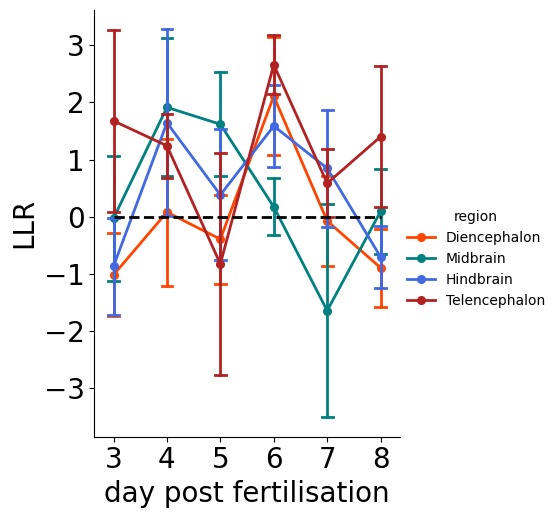

In [8]:
import seaborn as sns
data_name = 'llr'
dic = df

dic['condition'] = dic['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=20)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=20)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'LLR')
plt.hlines(0, 0,5, linestyles='--', color = 'k', linewidth=2)
cat_plot.set_xlabels(fontsize=20)
cat_plot.set_ylabels(fontsize=20)
plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot

plt.show()

In [12]:
print(np.mean(dic["llr"][dic["region"] == "Telencephalon"]), 1.96*np.std(dic["llr"][dic["region"] == "Telencephalon"])/np.sqrt(len(dic["llr"][dic["region"] == "Telencephalon"])))
print(np.mean(dic["llr"][dic["region"] == "Diencephalon" ]), 1.96*np.std(dic["llr"][dic["region"] == "Diencephalon"])/np.sqrt(len(dic["llr"][dic["region"] == "Diencephalon"])))
print(np.mean(dic["llr"][dic["region"] == "Midbrain" ]), 1.96*np.std(dic["llr"][dic["region"] == "Midbrain"])/np.sqrt(len(dic["llr"][dic["region"] == "Midbrain"])))
print(np.mean(dic["llr"][dic["region"] == "Hindbrain" ]), 1.96*np.std(dic["llr"][dic["region"] == "Hindbrain"])/np.sqrt(len(dic["llr"][dic["region"] == "Hindbrain"])))


1.076913654632995 1.030544745442866
-0.04144631163437451 0.7505776057275275
0.4636324232608156 0.8625976459163538
0.46660432650062306 0.8405023750866135


In [9]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic[data_name][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic[data_name][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=0.030234252228464806, pvalue=0.8739846488625189)
Diencephalon SignificanceResult(statistic=0.07739066055495096, pvalue=0.6843861908422704)
Midbrain SignificanceResult(statistic=-0.07897006179076628, pvalue=0.6782835250020279)
Hindbrain SignificanceResult(statistic=0.08100072052252884, pvalue=0.6704665014537048)


In [22]:
choose = 1
llr_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    llr_l[i] = np.load(data_ll[i])[choose][0]
    
reg_list = ['Diencephalon', 'Hindbrain', 'Midbrain', 'Telencephalon']


choose = 1
llr_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    llr_l[i] = np.load(data_ll[i])[choose][0]


len_list = []
seq_l = d3, d4, d5, d6, d7, d8
for i in range(len(seq_l)):
    count = 0
    for e in range(len(seq_l[i])):
        count+=1

    len_list = np.append(len_list, count)
cond = np.arange(3, 9)
cond_l = []
for i in range(len(len_list)):
    for e in range(int(len_list[i])):
        cond_l = np.append(cond_l, cond[i])
        
reg_data = np.ravel(adfn.repeat_list(reg_list, 30))
        
df = pd.DataFrame({'llr':llr_l , "condition": cond_l, "region": reg_data})

OSError: [Errno 5] Input/output error: 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_BR_MR_raw.npy'

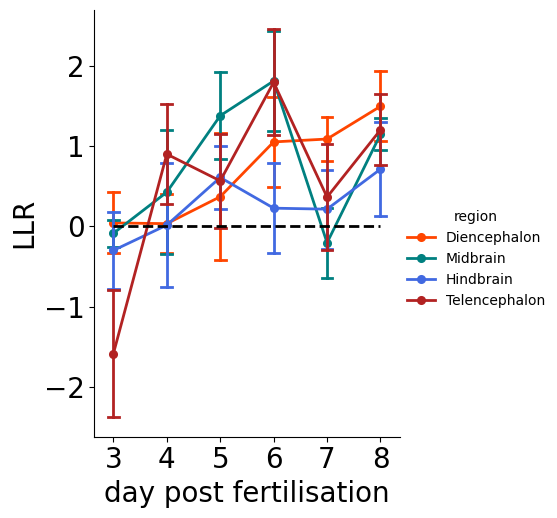

In [14]:
data_name = 'llr'
dic = df

dic['condition'] = dic['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=20)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=20)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'LLR')
plt.hlines(0, 0,5, linestyles='--', color = 'k', linewidth=2)
cat_plot.set_xlabels(fontsize=20)
cat_plot.set_ylabels(fontsize=20)
plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [379]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic[data_name][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic[data_name][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=0.3632622842375249, pvalue=0.048482228220640695)
Diencephalon SignificanceResult(statistic=0.49818827552574846, pvalue=0.005082892761342734)
Midbrain SignificanceResult(statistic=0.3079832409839885, pvalue=0.09777420963988383)
Hindbrain SignificanceResult(statistic=0.2010352144444936, pvalue=0.2867626772155227)


In [18]:
print(np.mean(dic["llr"][(dic["region"] == "Diencephalon") & (dic["condition"] == 3)]), 1.96*np.std(dic["llr"][(dic["region"] == "Diencephalon") & (dic["condition"] == 3)])/np.sqrt(len(dic["llr"][(dic["region"] == "Diencephalon") & (dic["condition"] == 3)])))
print(np.mean(dic["llr"][(dic["region"] == "Diencephalon") & (dic["condition"] == 8)]), 1.96*np.std(dic["llr"][(dic["region"] == "Diencephalon") & (dic["condition"] == 8)])/np.sqrt(len(dic["llr"][(dic["region"] == "Diencephalon") & (dic["condition"] == 8)])))


0.04237297515749856 0.6668179050175046
1.496298247772771 0.7683066586701057


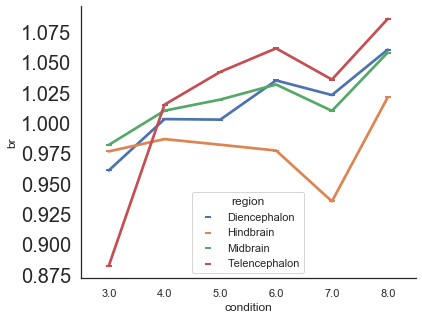

In [259]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, hue = 'region', data = dic, join=True, ci=0, scale=1, markers = '_')

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [36]:
# Create lists of coord data
#---------------------------------------------------------------------------
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*n_BR*raw*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*n_BR*raw*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf**n_BR*raw*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*n_BR*raw*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*n_BR*raw*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*n_BR*raw*')
data_ll = np.hstack((d3, d4, d5, d6, d7, d8))


In [37]:
#BR use MRE method

br_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    br_l[i] = np.load(data_ll[i])


len_list = []
seq_l = d3, d4, d5, d6, d7, d8
for i in range(len(seq_l)):
    count = 0
    for e in range(len(seq_l[i])):
        count+=1

    len_list = np.append(len_list, count)
cond = np.arange(3, 9)
cond_l = []
for i in range(len(len_list)):
    for e in range(int(len_list[i])):
        cond_l = np.append(cond_l, cond[i])
        
reg_data = np.ravel(adfn.repeat_list(reg_list, 30))
        
df = pd.DataFrame({'br':br_l , "condition": cond_l, "region": reg_data})

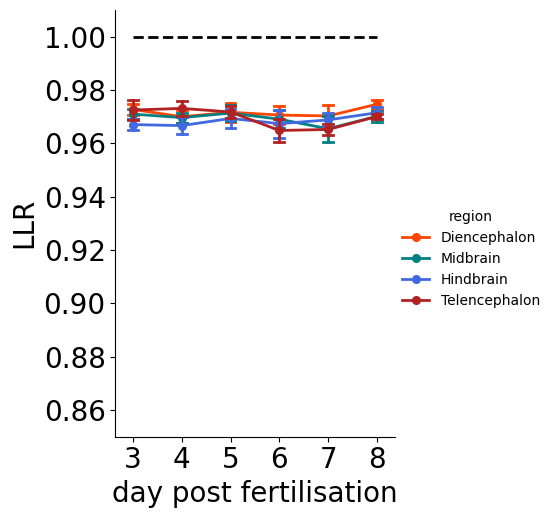

In [39]:
data_name = 'br'
dic = df
dic['condition'] = dic['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=0.8, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
# cat_plot.set_yticklabels(fontsize=10)  # Set y-axis tick labels
# cat_plot.set_xticklabels(fontsize=10)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'LLR')
cat_plot.set_xlabels(fontsize=20)
cat_plot.set_ylabels(fontsize=20)
plt.ylim(0.85, 1.01)
plt.hlines(1, 0,5, linestyles='--', color = 'k', linewidth=2)
plt.yticks(size = 20)
plt.xticks(size = 20)

plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()

In [40]:
print(np.mean(dic["br"][dic["region"] == "Telencephalon"]), 1.96*np.std(dic["br"][dic["region"] == "Telencephalon"])/np.sqrt(len(dic["br"][dic["region"] == "Telencephalon"])))
print(np.mean(dic["br"][dic["region"] == "Diencephalon" ]), 1.96*np.std(dic["br"][dic["region"] == "Diencephalon"])/np.sqrt(len(dic["br"][dic["region"] == "Diencephalon"])))
print(np.mean(dic["br"][dic["region"] == "Midbrain" ]), 1.96*np.std(dic["br"][dic["region"] == "Midbrain"])/np.sqrt(len(dic["br"][dic["region"] == "Midbrain"])))
print(np.mean(dic["br"][dic["region"] == "Hindbrain" ]), 1.96*np.std(dic["br"][dic["region"] == "Hindbrain"])/np.sqrt(len(dic["br"][dic["region"] == "Hindbrain"])))


0.9697936144128881 0.002384682600475589
0.9716953884414272 0.0022079485814556826
0.9696367065452741 0.0021672375619661414
0.9684681351792477 0.002503900104898051


In [462]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic[data_name][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic[data_name][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=-0.3192646783826694, pvalue=0.08548439220954905)
Diencephalon SignificanceResult(statistic=0.07874443304279266, pvalue=0.6791541250384614)
Midbrain SignificanceResult(statistic=-0.11394251772667705, pvalue=0.5488207229282381)
Hindbrain SignificanceResult(statistic=0.26579066511292193, pvalue=0.1557184404276166)


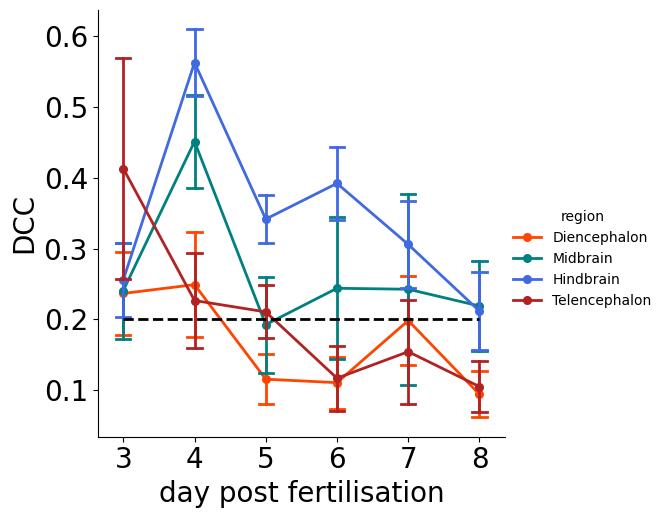

In [31]:
data_name = 'dcc'
dic = dcc_df
dic['condition'] = dic['condition'].astype(int)

# Your existing catplot code
cat_plot = sns.catplot(data=dic, x='condition', y=data_name, hue='region', linewidth=2,errorbar='se', capsize=0.2, kind='point', height=5, aspect=1, 
            hue_order=['Diencephalon', 'Midbrain', 'Hindbrain', 'Telencephalon'], palette=['orangered', 'teal', 'royalblue', 'firebrick'])

# Set x and y tick labels
cat_plot.set_yticklabels(fontsize=20)  # Set y-axis tick labels
cat_plot.set_xticklabels(fontsize=20)  # Set x-axis tick labels
cat_plot.set_axis_labels('day post fertilisation', 'DCC')
cat_plot.set_xlabels(fontsize=20)
cat_plot.set_ylabels(fontsize=20)
plt.hlines(0.2, 0,5, linestyles='--', color = 'k', linewidth=2)
plt.savefig(Fcode + 'prac.svg', transparent=True)
# Show the plot
plt.show()


In [413]:
from scipy import stats
print(f'Telencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Telencephalon"], dic["condition"][dic["region"] == "Telencephalon"])}') 
print(f'Diencephalon {stats.spearmanr(dic[data_name][dic["region"] == "Diencephalon"], dic["condition"][dic["region"] == "Diencephalon"])}')
print(f'Midbrain {stats.spearmanr(dic[data_name][dic["region"] == "Midbrain"], dic["condition"][dic["region"] == "Midbrain"])}')
print(f'Hindbrain {stats.spearmanr(dic[data_name][dic["region"] == "Hindbrain"], dic["condition"][dic["region"] == "Hindbrain"])}')

Telencephalon SignificanceResult(statistic=-0.44539114849992184, pvalue=0.013644057499422171)
Diencephalon SignificanceResult(statistic=-0.34227881067597843, pvalue=0.06410510058759952)
Midbrain SignificanceResult(statistic=-0.19562012449312677, pvalue=0.30021167612203564)
Hindbrain SignificanceResult(statistic=-0.29625054608936036, pvalue=0.11192449245209778)


In [32]:
print(np.mean(dic["dcc"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)]), 1.96*np.std(dic["dcc"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])/np.sqrt(len(dic["dcc"][(dic["region"] == "Telencephalon") & (dic["condition"] == 3)])))
print(np.mean(dic["dcc"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)]), 1.96*np.std(dic["dcc"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])/np.sqrt(len(dic["dcc"][(dic["region"] == "Telencephalon") & (dic["condition"] == 8)])))


0.4129451115294449 0.27384702509535486
0.10502775202982848 0.06369650750260716


In [424]:
# Create datalists
#---------------------------------------------------------------------------
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Tel*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Tel*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Tel*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Tel*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Tel*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Tel*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [429]:
def prac(data):
    loaded = np.load(data, allow_pickle=True).item()
    av = loaded['av']
    avsize = av[0]
    avdur = (1/2.73)*av[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    return(sizevec,durvec)

In [446]:
len(data_ll)

6

/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_7378/555783493.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = al, c = colors[i+3])
/var/folders/7t/rvqbbd0x4mvdgs2rdk37d4yr0000gn/T/ipykernel_7378/555783493.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.7, c = colors[3])
/var/folders/7t/rvqbbd0x4mvdgs2

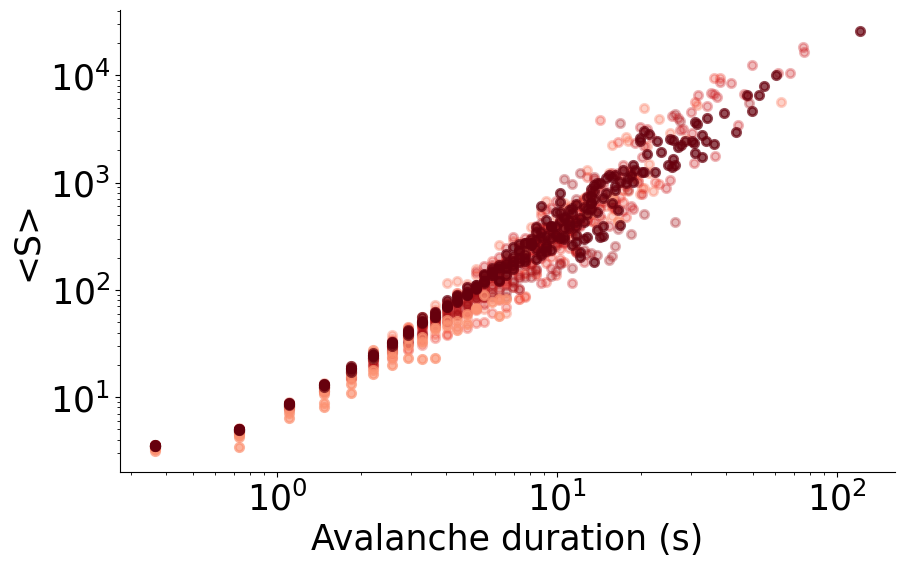

In [454]:
colors  = cm.Reds(np.linspace(0,1,len(data_ll)+3))
fig, axarr = plt.subplots(figsize = (10,6))

#labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$', '10$^3$','10$^4$','10$^5$']
    
for i in range(len(data_ll)):    
    for e in range(len(data_ll[i])):
        yaxis, xaxis = prac(data_ll[i][e])
        if i ==0 or i == len(data_ll)-1:
            continue
        else:
            al = 0.3
            axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = al, c = colors[i+3])


for e in range(len(data_ll[0])):
    yaxis, xaxis = prac(data_ll[0][e])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.7, c = colors[3])

for e in range(len(data_ll[-1])):
    yaxis, xaxis = prac(data_ll[-1][e])
    axarr.scatter(xaxis, yaxis, linewidth = 2, alpha = 0.7, c = colors[3 + len(data_ll)-1])
    
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('<S>', size = '25')
axarr.set_xlabel('Avalanche duration (s)', size = '25')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 25)
plt.xticks(size = 25)
#plt.ylim(0.00001,1.5)
#plt.legend()

#axarr.set_xticklabels(labels, size = 15)
#axarr.set_yticklabels(labels, size = 15)
#plt.xlim(right = 800) 
#plt.ylim(top = 300000)  

plt.savefig(Fcode + 'prac.svg', transparent = True)
plt.show()

# Telencephalon

In [238]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*crit*')
d3

['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_criticality.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_criticality.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Midbrain_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
 'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Diencephalon_criticality.npy',
 'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Hindbrain_criticality.npy',
 

In [387]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Tel*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Tel*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Tel*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Tel*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Tel*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Tel*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [48]:
for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        av = data['av']
        
        print(data_ll[i][e])
        print(np.max(av[0]), np.max(av[1])/2.73)

BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
8 1.465201465201465
BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
76 6.227106227106227
BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
728 16.483516483516485
BLNDEV-WILDTYPE-07_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
41 2.197802197802198
BLNDEV-WILDTYPE-08_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_criticality.npy
42 3.663003663003663
BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_criticality.npy
128 7.6923076923076925
BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_criticality.npy
67 4.029304029304029
BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_criticality.npy
674 10.256410256410257
BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_criticality.npy
5604 63.36996336996337
BLNDEV-WILDTYPE-05_2photon_sess-01-4dpf_BLNGR_run-01_Tele

In [240]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


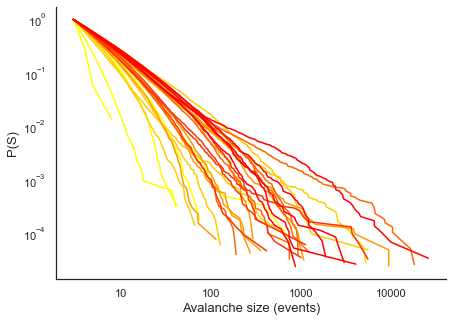

In [37]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0

fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

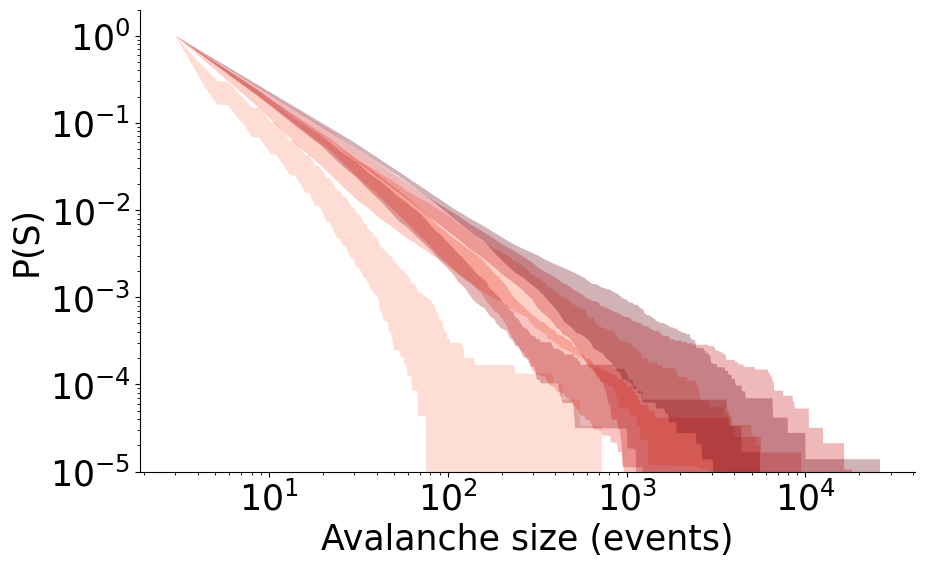

In [401]:
from matplotlib import cm


colors  = cm.Reds(np.linspace(0,1,len(data_ll)+3))
choose=0
fig, axarr = plt.subplots(figsize = (10,6))

for i in range(len(data_ll)):
    yaxis, xaxis, histlist = crfn.mean_av(data_ll[i], 1000, 'size')
    #hist = plt.plot(yaxis, xaxis, c = colors[i+3], linewidth = 10)
    stop = 30000
    xaxis = np.mean(histlist, axis= 0)
    sem = stats.sem(histlist)
    minus = (xaxis-(sem))[:stop]
    #minus [minus < 0.00001] = 0
    plus = (xaxis+(sem))[:stop]
    plt.fill_between(yaxis[:stop], minus, plus,facecolor=colors[i+3],alpha=0.3,linewidth = 0)


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '25')
axarr.set_xlabel('Avalanche size (events)', size = '25')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 25)
plt.xticks(size = 25)
plt.ylim(0.00001, 2)
plt.savefig(Fcode + 'prac.png', transparent = True, dpi=300)
plt.show()

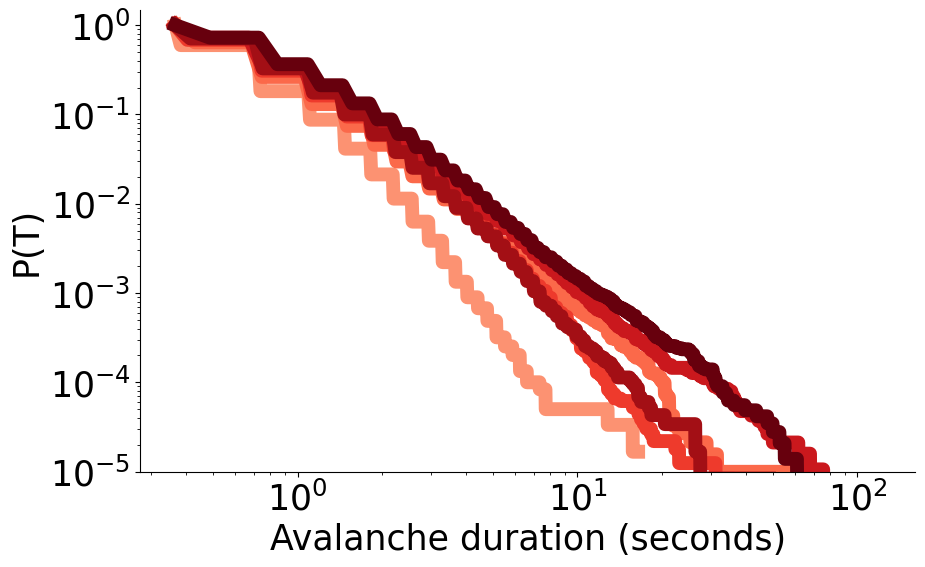

In [409]:
%autoreload
from matplotlib import cm


colors  = cm.Reds(np.linspace(0,1,len(data_ll)+3))
choose=0
fig, axarr = plt.subplots(figsize = (10,6))

for i in range(len(data_ll)):
    yaxis, xaxis, histlist = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i+3], linewidth = 10, label = f'{int(i+3)} dpf')
    stop = 30000
    xaxis = np.mean(histlist, axis= 0)
    sem = stats.sem(histlist)
    minus = (xaxis-(sem))[:stop]
    #minus [minus < 0.00001] = 0
    plus = (xaxis+(sem))[:stop]
    #plt.fill_between(yaxis[:stop], minus, plus,facecolor=colors[i+3],alpha=0.3,linewidth = 0)


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(T)', size = '25')
axarr.set_xlabel('Avalanche duration (seconds)', size = '25')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 25)
plt.xticks(size = 25)
plt.ylim(0.00001,1.5)
#plt.legend()
plt.savefig(Fcode + 'prac.svg', transparent = True)

plt.show()

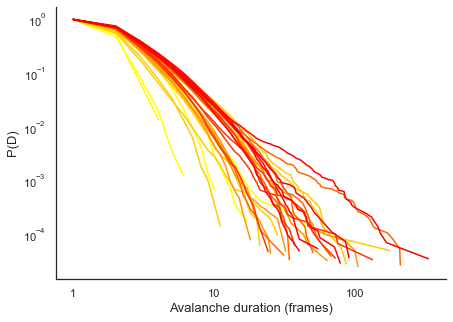

In [94]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(D)', size = '13')
axarr.set_xlabel('Avalanche duration (frames)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

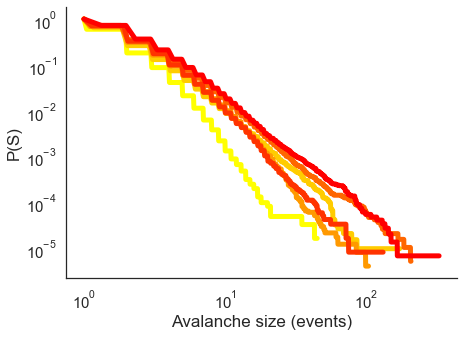

In [44]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

In [ ]:
#Calculate LLR

import powerlaw
def do(avdistcut, typ):
    results = powerlaw.Fit(avdistcut, discrete=True)
    print(results.power_law.alpha)
    print(results.power_law.xmin)
    R, p = results.distribution_compare(typ, 'lognormal', normalized_ratio=True)
    return(R,p)

out_l = list(range(len(data_ll)))
for i in range(14,len(data_ll)):
    out = list(range(2))
    for choose in [0,1]:
        data = np.load(data_ll[i], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        if np.max(avdistcut)<11:
            typ = 'power_law'
        else:
            typ = 'truncated_power_law'
        out[choose] = do(avdistcut, typ)
    out_l[i] = out
    prename = data_ll[i]
    name = prename[:prename.find('crit')]
    np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + 'LLR_allstot.npy', out)
    print(i)

In [3]:
# Create lists of coord data
#---------------------------------------------------------------------------

d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Te*LLR*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Te*LLR*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Te*LLR*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Te*LLR*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Te*LLR*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Te*LLR*')
data_ll = np.hstack((d3, d4, d5, d6, d7, d8))
data_ll

array(['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-07_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-08_2photon_sess-01-3dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-05_2photon_sess-01-4dpf_BLNGR_run-01_Telencephalon_LLR_allstot.npy',
       'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_Telenceph

In [4]:
choose = 1
llr_l = np.zeros(len(data_ll))
for i in range(len(data_ll)):
    llr_l[i] = np.load(data_ll[i])[choose][0]


len_list = []
seq_l = d3, d4, d5, d6, d7, d8
for i in range(len(seq_l)):
    count = 0
    for e in range(len(seq_l[i])):
        count+=1

    len_list = np.append(len_list, count)
cond = np.arange(3, 9)
cond_l = []
for i in range(len(len_list)):
    for e in range(int(len_list[i])):
        cond_l = np.append(cond_l, cond[i])
        
df = pd.DataFrame({'llr':llr_l , "condition": cond_l})

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


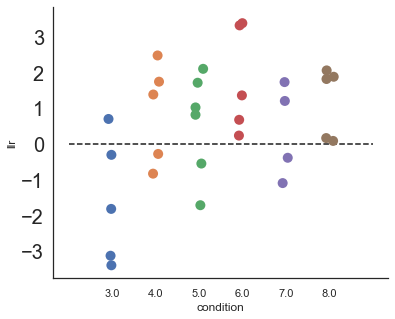

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'llr'
dic = df

fig, ax = plt.subplots(figsize = (6,5))
#ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)
plt.hlines(0, -1,6, linestyles='--')
plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


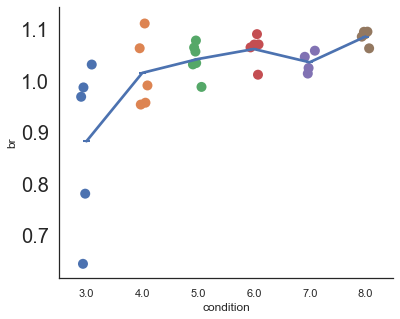

In [111]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [112]:
from scipy import stats
stats.spearmanr(dic['br'], dic['condition'])

SpearmanrResult(correlation=0.6150639669760826, pvalue=0.000298085372196457)

In [113]:
from scipy import stats
stats.spearmanr(np.append(dic['br'][1:3], dic['br'][4:]), np.append(dic['condition'][1:3], dic['condition'][4:]))

SpearmanrResult(correlation=0.534302114579305, pvalue=0.0034025301256914993)

In [97]:
from scipy import stats
stats.spearmanr(dic['br'][5:], dic['condition'][5:])

SpearmanrResult(correlation=0.4146120970224812, pvalue=0.0393291313358788)

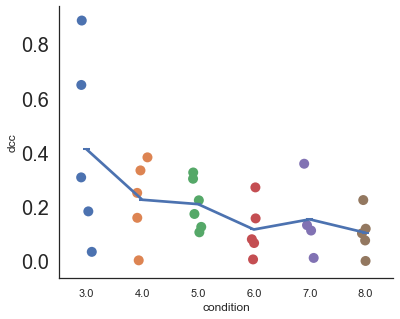

In [114]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [115]:
from scipy import stats
stats.spearmanr(dic['dcc'], dic['condition'])

SpearmanrResult(correlation=-0.44539114849992184, pvalue=0.013644057499422171)

In [116]:
from scipy import stats
stats.spearmanr(np.append(dic['dcc'][1:3], dic['dcc'][4:]), np.append(dic['condition'][1:3], dic['condition'][4:]))

SpearmanrResult(correlation=-0.338141275841401, pvalue=0.07841457990949091)

In [56]:
from scipy import stats
stats.spearmanr(dic['dcc'][5:], dic['condition'][5:])

SpearmanrResult(correlation=-0.3981218431636325, pvalue=0.048718338188739024)

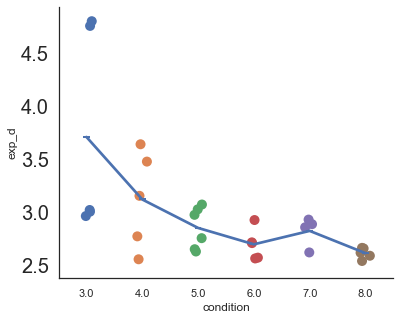

In [58]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [59]:
from scipy import stats
stats.spearmanr(dic['exp_d'], dic['condition'])

SpearmanrResult(correlation=-0.6441700754646793, pvalue=0.00012234503100635134)

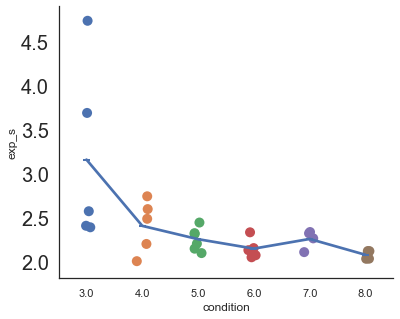

In [60]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [61]:
from scipy import stats
stats.spearmanr(dic['exp_s'], dic['condition'])

SpearmanrResult(correlation=-0.6592872015789116, pvalue=7.422090682505358e-05)

# Tectum

In [139]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Mid*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Mid*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Mid*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Mid*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Mid*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Mid*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [140]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


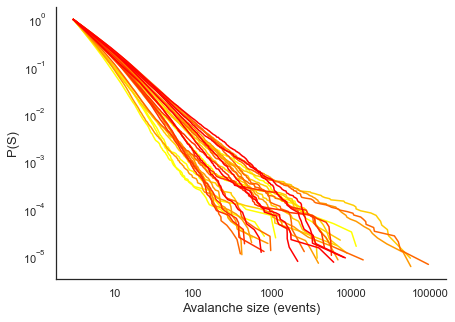

In [74]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


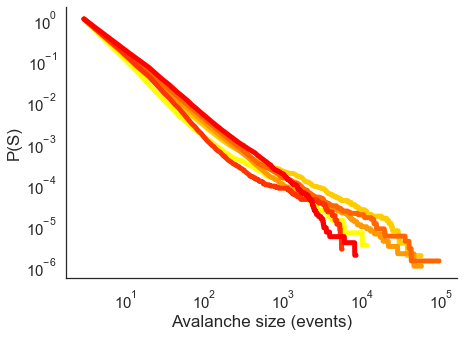

In [75]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

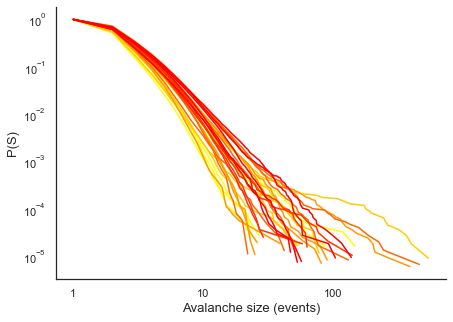

In [76]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


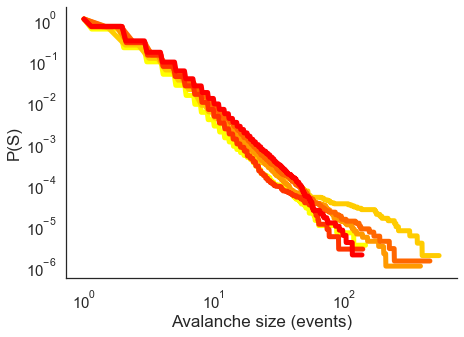

In [77]:
colors  = cm.autumn_r(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

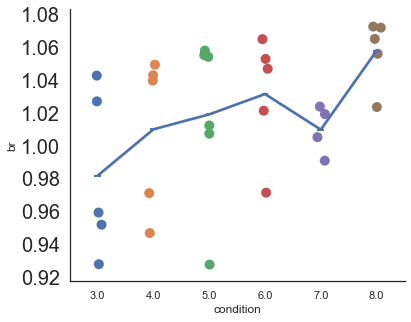

In [78]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [79]:
from scipy import stats
stats.spearmanr(dic['br'], dic['condition'])

SpearmanrResult(correlation=0.44719617848371074, pvalue=0.013223230200960032)

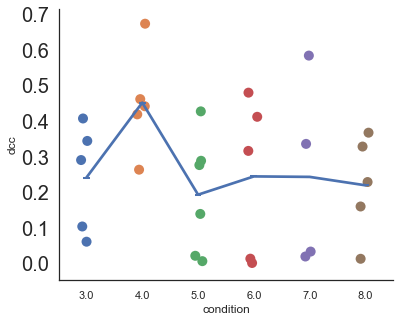

In [80]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [81]:
from scipy import stats
stats.spearmanr(dic['dcc'], dic['condition'])

SpearmanrResult(correlation=-0.19562012449312677, pvalue=0.30021167612203564)

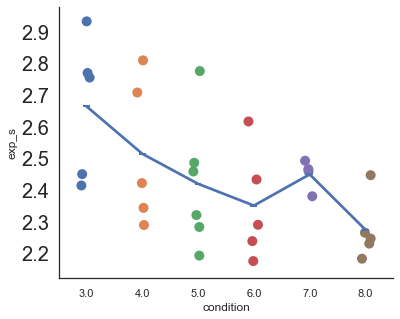

In [82]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [83]:
from scipy import stats
stats.spearmanr(dic['exp_s'], dic['condition'])

SpearmanrResult(correlation=-0.46592336456552114, pvalue=0.009460842089336332)

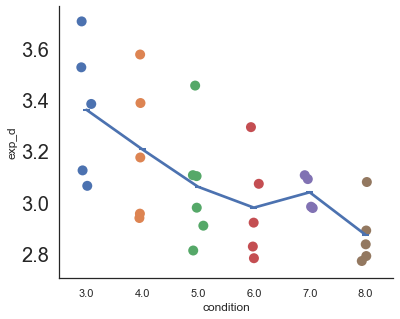

In [84]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [85]:
from scipy import stats
stats.spearmanr(dic['exp_d'], dic['condition'])

SpearmanrResult(correlation=-0.5837015710077497, pvalue=0.0007090881262309532)

# Diencephalon

In [141]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Di*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Di*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Di*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Di*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Di*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Di*crit*')
data_ll = d3, d4, d5, d6, d7, d8


In [142]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


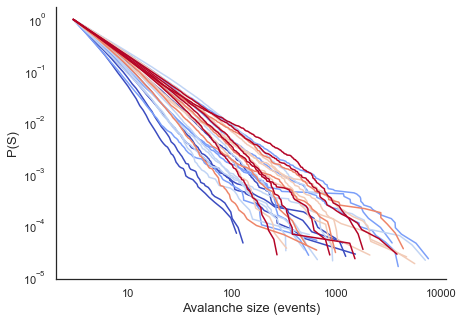

In [569]:

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


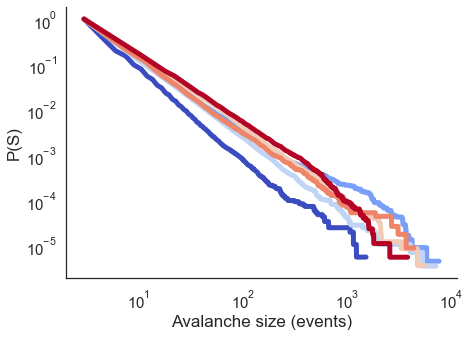

In [570]:
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

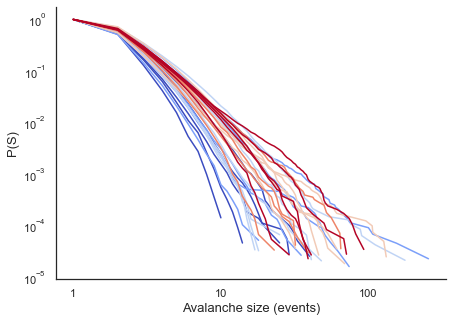

In [571]:

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


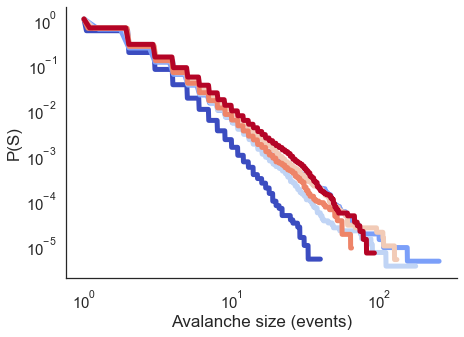

In [573]:
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

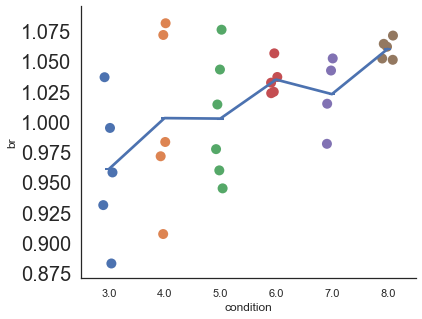

In [577]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

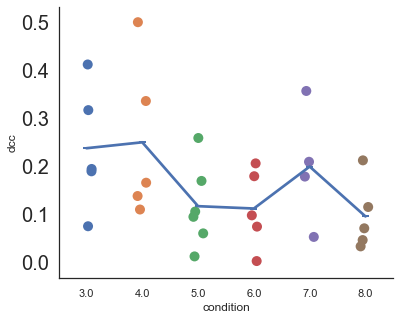

In [578]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

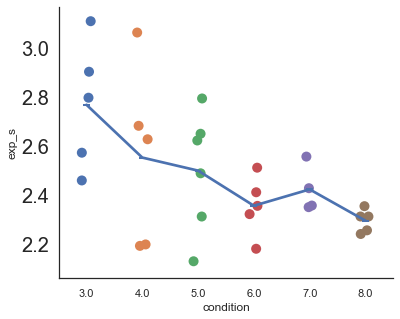

In [579]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

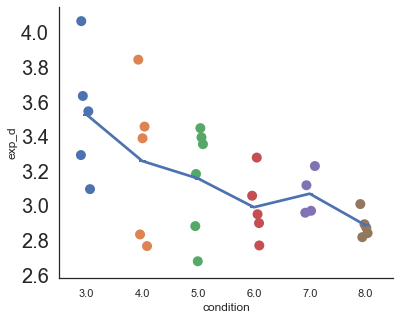

In [581]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Hindbrain

In [126]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Hi*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Hi*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Hi*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Hi*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Hi*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Hi*crit*')
data_ll = d3, d4, d5, d6, d7, d8

In [143]:
name_list = ['br', 'dcc', 'exp_s', 'exp_d']
obj, len_list = load(data_ll, name_list)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


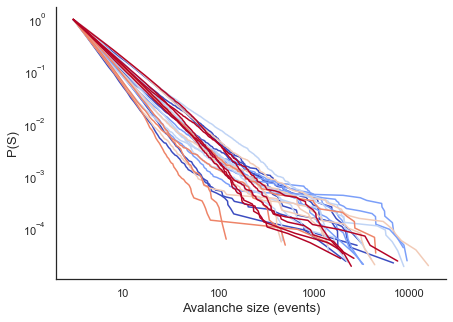

In [600]:

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


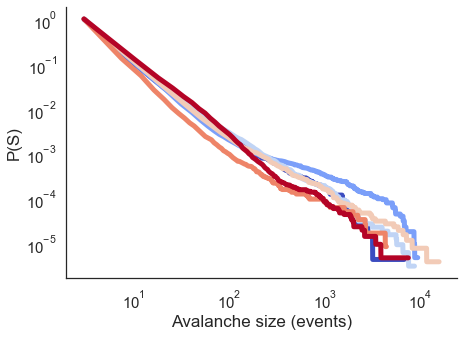

In [601]:
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'size')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

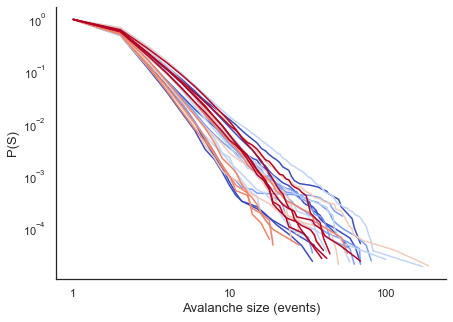

In [598]:

import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    for e in range(len(data_ll[i])):
        data = np.load(data_ll[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


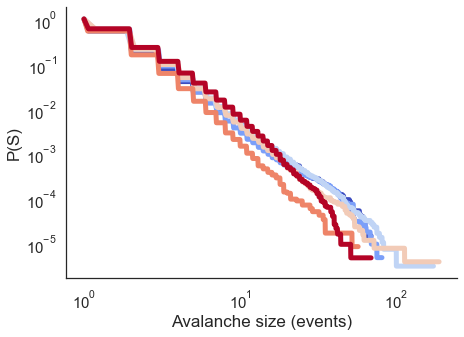

In [599]:
colors  = cm.coolwarm(np.linspace(0,1,len(data_ll)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_ll)):
    yaxis, xaxis = crfn.mean_av(data_ll[i], 1000, 'dur')
    hist = plt.plot(yaxis, xaxis, c = colors[i], linewidth = 5)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

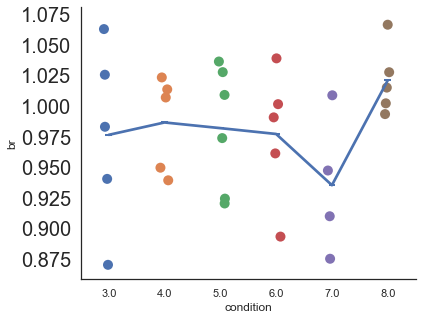

In [603]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

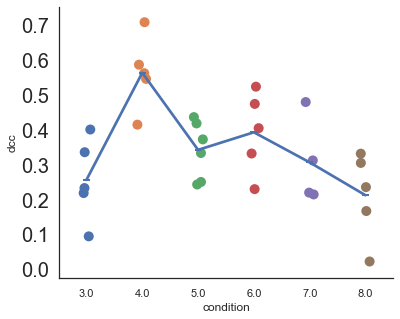

In [610]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

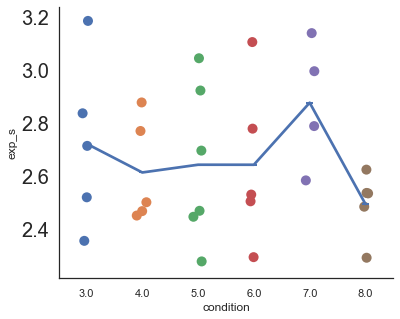

In [608]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

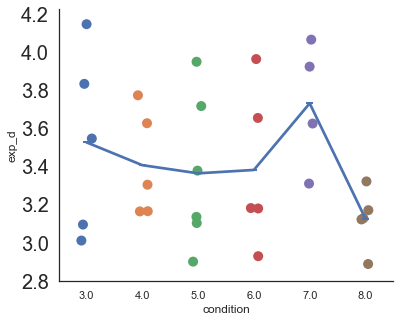

In [609]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Environmental enrichment - Tectal data

In [51]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_bin = sorted(glob.glob('*NR*3dpf*spikes.dat*')) 
NR_5_bin = sorted(glob.glob('*NR*5dpf*spikes.dat*')) 
NR_7_bin = sorted(glob.glob('*NR*7dpf*spikes.dat*')) 

GR_3_bin = sorted(glob.glob('*GR*3dpf*spikes.dat*')) 
GR_5_bin = sorted(glob.glob('*GR*5dpf*spikes.dat*')) 
GR_7_bin = sorted(glob.glob('*GR*7dpf*spikes.dat*')) 

NR_3_coord = sorted(glob.glob('*NR*3dpf*cent*')) 
NR_5_coord = sorted(glob.glob('*NR*5dpf*cent*')) 
NR_7_coord = sorted(glob.glob('*NR*7dpf*cent*')) 

GR_3_coord = sorted(glob.glob('*GR*3dpf*cent*')) 
GR_5_coord = sorted(glob.glob('*GR*5dpf*cent*')) 
GR_7_coord = sorted(glob.glob('*GR*7dpf*cent*')) 

bin_list = NR_3_bin, NR_5_bin, NR_7_bin, GR_3_bin, GR_5_bin, GR_7_bin
coord_list = NR_3_coord, NR_5_coord, NR_7_coord, GR_3_coord, GR_5_coord, GR_7_coord

In [ ]:
#nnb
#-------
for i in range(len(coord_list)):
    for e in range(len(coord_list[i])):
        coord = np.loadtxt(coord_list[i][e])
        nnb = crfn.neighbour_new(coord, 50, [.8, .8, 5])
        np.save(savepath + coord_list[i][e][:coord_list[i][e].find('all_cells')+10] + 'nnb.npy', nnb)
        print('Done ' + coord_list[i][e])

In [71]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_nnb = sorted(glob.glob('*NR*3dpf*nnb*')) 
NR_5_nnb = sorted(glob.glob('*NR*5dpf*nnb*')) 
NR_7_nnb = sorted(glob.glob('*NR*7dpf*nnb*')) 

GR_3_nnb = sorted(glob.glob('*GR*3dpf*nnb*')) 
GR_5_nnb = sorted(glob.glob('*GR*5dpf*nnb*')) 
GR_7_nnb = sorted(glob.glob('*GR*7dpf*nnb*')) 
nnb_list = NR_3_nnb, NR_5_nnb, NR_7_nnb, GR_3_nnb, GR_5_nnb, GR_7_nnb

In [90]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_pkg = sorted(glob.glob('*NR*3dpf*pkg*')) 
NR_5_pkg = sorted(glob.glob('*NR*5dpf*pkg*')) 
NR_7_pkg = sorted(glob.glob('*NR*7dpf*pkg*')) 

GR_3_pkg = sorted(glob.glob('*GR*3dpf*pkg*')) 
GR_5_pkg = sorted(glob.glob('*GR*5dpf*pkg*')) 
GR_7_pkg = sorted(glob.glob('*GR*7dpf*pkg*')) 
NR_3_av = sorted(glob.glob('*NR*3dpf*av*')) 
NR_5_av = sorted(glob.glob('*NR*5dpf*av*')) 
NR_7_av = sorted(glob.glob('*NR*7dpf*av*')) 

GR_3_av = sorted(glob.glob('*GR*3dpf*av*')) 
GR_5_av = sorted(glob.glob('*GR*5dpf*av*')) 
GR_7_av = sorted(glob.glob('*GR*7dpf*av*')) 
NR_list = NR_3_av, NR_5_av, NR_7_av
GR_list = GR_3_av, GR_5_av, GR_7_av
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_av.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_av.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_av.npy',
   '180220_WT_NR_h2b_gc6s_7dpf_f2_sa_a

In [ ]:
#av calculation
#----------------
for i in range(len(nnb_list)):
    for e in range(len(nnb_list[i])):
        nnb = np.load(nnb_list[i][e])
        bind = np.loadtxt(bin_list[i][e])
        av,pkg = crfn.avalanche_r(nnb, bind)
        np.save(savepath + nnb_list[i][e][:nnb_list[i][e].find('all_cells')+10] + 'av.npy', av)
        np.save(savepath + nnb_list[i][e][:nnb_list[i][e].find('all_cells')+10] + 'pkg.npy', pkg)
        print('Done ' + nnb_list[i][e])

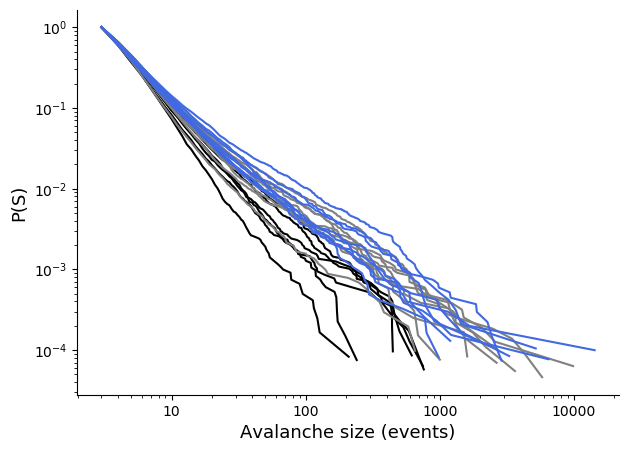

In [107]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(NR_list)):
    for e in range(len(NR_list[i])):
        avdistcut = np.load(NR_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

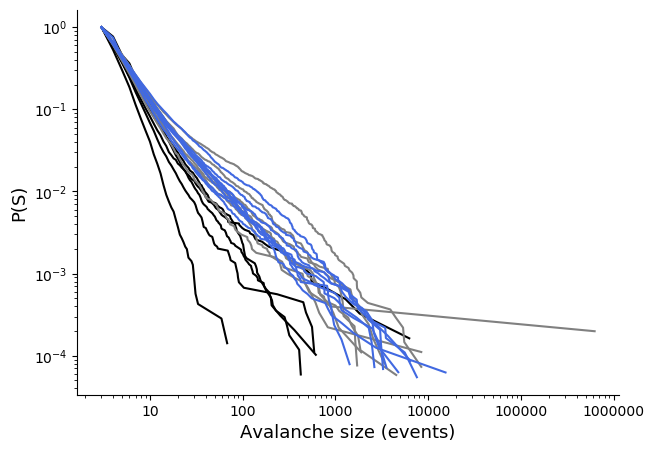

In [108]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(GR_list)):
    for e in range(len(GR_list[i])):
        avdistcut = np.load(GR_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

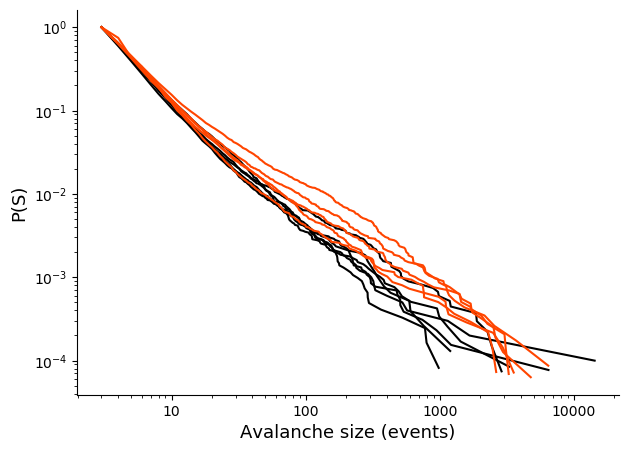

In [120]:
#3dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 0
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

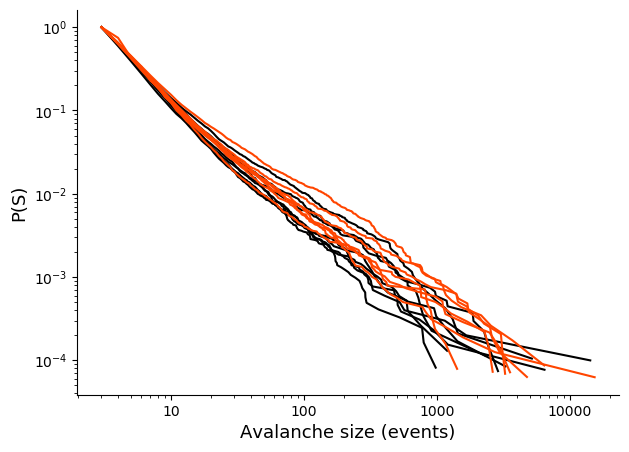

In [119]:
#5dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 1
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

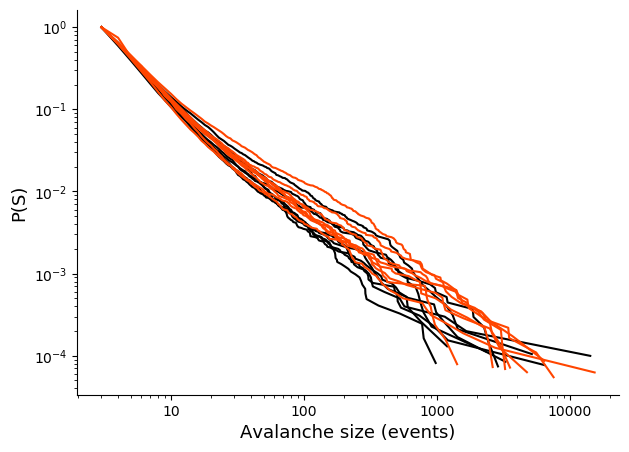

In [118]:
#7dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 2
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [179]:
np.load(av_list[i][e])

array([[245,   4,  32, ...,   8,   5,   3],
       [ 13,   2,   7, ...,   3,   2,   1]])

In [181]:
for i in range(len(av_list)):
    for e in range(len(av_list[i])):
        curr_av = np.load(av_list[i][e])
        dcc = crfn.DCC(curr_av)
        np.save(savepath + av_list[i][e][:av_list[i][e].find('all_cells')+10] + 'dcc.npy', dcc)
        print('Done ' + av_list[i][e])

Done 180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy
Done 180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy
Done 180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_av.npy
Done 180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy
Done 180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy
Done 180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_av.npy
Done 180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy
Done 180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy
Done 180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_av.npy
Done 180220_WT_NR_h2b_gc6s_7dpf_f2_sa_aligned_all_cells

In [182]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_dcc = sorted(glob.glob('*NR*3dpf*dcc*')) 
NR_5_dcc = sorted(glob.glob('*NR*5dpf*dcc*')) 
NR_7_dcc = sorted(glob.glob('*NR*7dpf*dcc*')) 

GR_3_dcc = sorted(glob.glob('*GR*3dpf*dcc*')) 
GR_5_dcc = sorted(glob.glob('*GR*5dpf*dcc*')) 
GR_7_dcc = sorted(glob.glob('*GR*7dpf*dcc*')) 

NR_list = NR_3_dcc, NR_5_dcc, NR_7_dcc
GR_list = GR_3_dcc, GR_5_dcc, GR_7_dcc
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_dcc.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_dcc.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_dcc.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_dcc.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180220_WT_NR_h2b_gc

In [196]:
np.load(NR_list[0][0])

array([0.1481087 , 2.82263298, 3.20916077])

In [210]:
#EXP - SIZE
import pandas as pd

exp_s = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            exp_s[count] = np.load(list_list[i][x][e])[1]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
exps_df = pd.DataFrame({"exponent":exp_s , "age":age, "condition": cond})

exp_d = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            exp_d[count] = np.load(list_list[i][x][e])[2]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
expd_df = pd.DataFrame({"exponent":exp_d , "age":age, "condition": cond})


dcc = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            dcc[count] = np.load(list_list[i][x][e])[0]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
dcc_df = pd.DataFrame({"dcc":dcc , "age":age, "condition": cond})

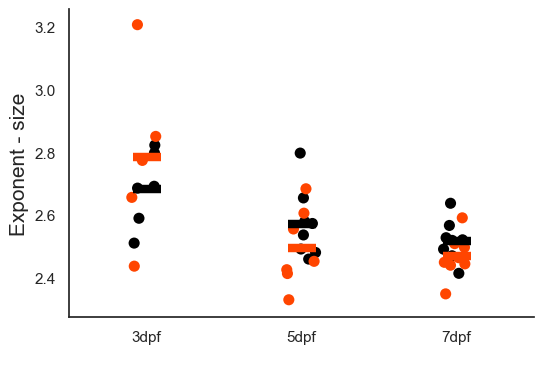

In [203]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="exponent", data = exps_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="exponent", data = exps_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Exponent - size', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

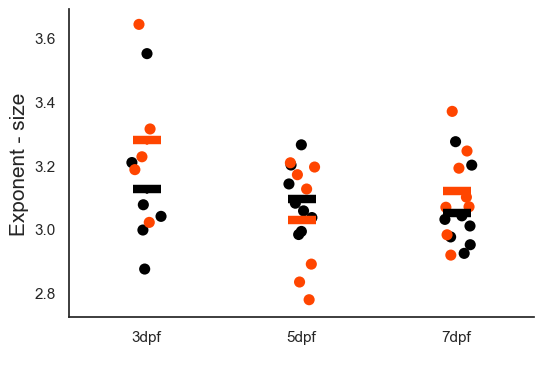

In [209]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="exponent", data = expd_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="exponent", data = expd_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Exponent - dur', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

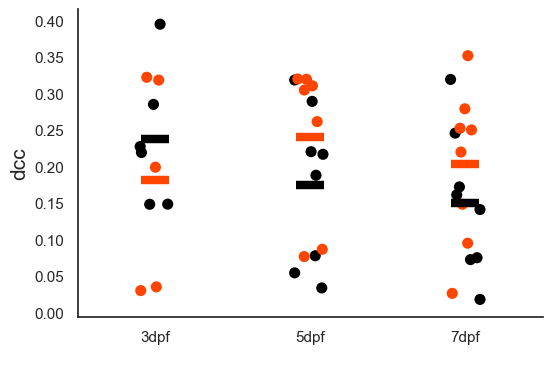

In [213]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="dcc", data = dcc_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="dcc", data = dcc_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('dcc', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [ ]:
#BR 
#----------------
for i in range(len(pkg_list)):
    for e in range(len(pkg_list[i])):
        pkg = np.load(pkg_list[i][e])
        av = np.load(av_list[i][e])
        br = crfn.branch(pkg, av)
        np.save(savepath + pkg_list[i][e][:pkg_list[i][e].find('all_cells')+10] + 'br.npy', br)
        print('Done ' + _list[i][e])

In [125]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_br = sorted(glob.glob('*NR*3dpf*br*')) 
NR_5_br = sorted(glob.glob('*NR*5dpf*br*')) 
NR_7_br = sorted(glob.glob('*NR*7dpf*br*')) 

GR_3_br = sorted(glob.glob('*GR*3dpf*br*')) 
GR_5_br = sorted(glob.glob('*GR*5dpf*br*')) 
GR_7_br = sorted(glob.glob('*GR*7dpf*br*')) 

NR_list = NR_3_br, NR_5_br, NR_7_br
GR_list = GR_3_br, GR_5_br, GR_7_br
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_br.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_br.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_br.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_br.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_br.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_br.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_br.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_br.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_br.npy',
   '180220_WT_NR_h2b_gc6s_7dpf_f2_sa_a

In [158]:
#BRANCH RATIO
import pandas as pd

branch = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            branch[count] = np.load(list_list[i][x][e])
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
bdf = pd.DataFrame({"Branching ratio":branch , "age":age, "condition": cond})


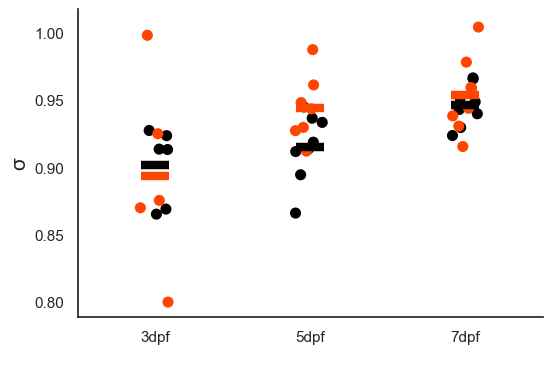

In [176]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="Branching ratio", data = bdf, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="Branching ratio", data = bdf, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()